In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr, norm
import statsmodels.api as sm

from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
filename = "fish1.txt"

time_weight_bait_data = pd.read_csv(filename, sep=' ', header=None, index_col=None)
time_weight_bait_data.columns=["Time", "Weight", "Bait"]

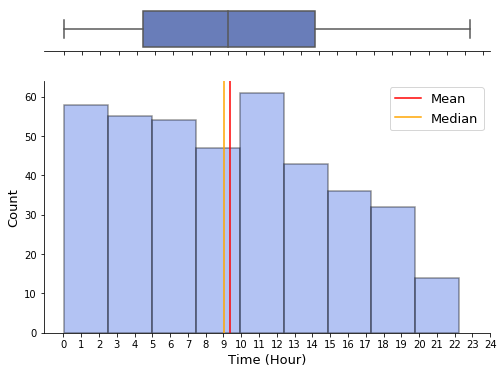

0    0.93
1    3.11
2    4.99
dtype: float64


In [4]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(8, 6))

sns.boxplot(time_weight_bait_data["Time"], color='royalblue', saturation=0.5, ax=ax_box)
sns.distplot(time_weight_bait_data["Time"], kde=False, color='royalblue', hist_kws=dict(edgecolor="k", linewidth=1.5, alpha=0.4), ax=ax_hist)

ax_box.set(yticks=[])
ax_box.set_xlabel("")
sns.despine(ax=ax_box, left=True)

ax_hist.set_ylabel("Count", fontsize=13)
ax_hist.set_xlabel("Time (Hour)", fontsize=13)
ax_hist.axvline(time_weight_bait_data["Time"].mean(), color='r', label='Mean', alpha=1)
ax_hist.axvline(time_weight_bait_data["Time"].median(), color='orange', label='Median', alpha=1)
ax_hist.set_xticks(list(range(25)))
# ax_hist.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

sns.despine(ax=ax_hist)

plt.legend(fontsize=13)
# ax_box.set_title("Number of Catches", fontsize=14, pad=10)

# plt.savefig("hist1", bbox_inches="tight")
plt.show()
print(time_weight_bait_data["Time"].mode())

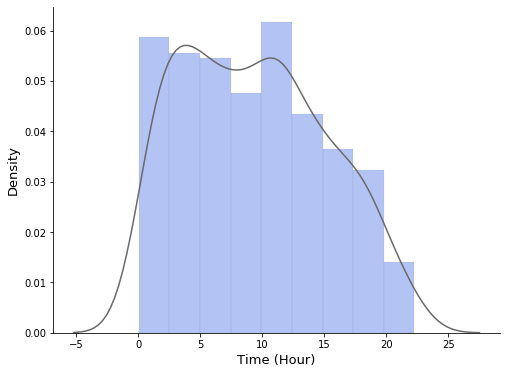

In [5]:
plt.figure(figsize=(8, 6))

sns.distplot(time_weight_bait_data["Time"], color='royalblue', hist_kws=dict(edgecolor="k", linewidth=0.1, alpha=0.4), kde=True,
            kde_kws=dict(color='dimgray'))
sns.despine()
plt.xlabel("Time (Hour)", fontsize=13)
plt.ylabel("Density", fontsize=13)
# plt.savefig("kde1", bbox_inches="tight")
plt.show()

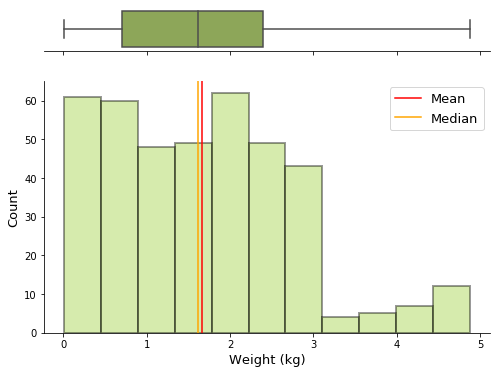

0    0.11
1    0.70
2    0.87
dtype: float64


In [37]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(8, 6))

sns.boxplot(time_weight_bait_data["Weight"], color='yellowgreen', saturation=0.5, ax=ax_box)
sns.distplot(time_weight_bait_data["Weight"], color='yellowgreen', kde=False, hist_kws=dict(edgecolor="k", linewidth=2))

ax_box.set(yticks=[])
ax_box.set_xlabel("")
sns.despine(ax=ax_box, left=True)

ax_hist.set_ylabel("Count", fontsize=13)
ax_hist.set_xlabel("Weight (kg)", fontsize=13)
ax_hist.axvline(time_weight_bait_data["Weight"].mean(), color='r', label='Mean', alpha=1)
ax_hist.axvline(time_weight_bait_data["Weight"].median(), color='orange', label='Median', alpha=1)

sns.despine(ax=ax_hist)

plt.legend(fontsize=13)
# ax_box.set_title("Number of Catches", fontsize=14, pad=10)

# plt.savefig("hist2", bbox_inches="tight")
plt.show()
print(time_weight_bait_data["Weight"].mode())

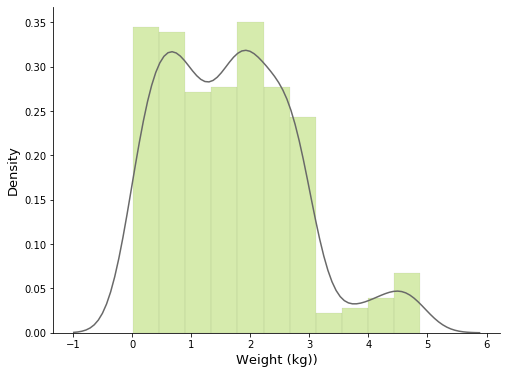

In [7]:
plt.figure(figsize=(8, 6))

sns.distplot(time_weight_bait_data["Weight"], color='yellowgreen', hist_kws=dict(edgecolor="k", linewidth=0.1), kde=True,
            kde_kws=dict(color='dimgray'))
sns.despine()
plt.xlabel("Weight (kg))", fontsize=13)
plt.ylabel("Density", fontsize=13)
# plt.savefig("kde2", bbox_inches="tight")
plt.show()

In [6]:
#If you run the "describe" function, it will show you LOTS of useful stats for both colunmns
print(time_weight_bait_data.describe())
print("Time")
print(iqr(time_weight_bait_data["Time"]))
print(time_weight_bait_data["Time"].var())
print(time_weight_bait_data["Time"].std() / 20)

print("Weight")
print(iqr(time_weight_bait_data["Weight"]))
print(time_weight_bait_data["Weight"].var(ddof=1))
print(time_weight_bait_data["Weight"].std(ddof=1) / 20)

print("Calculate")
print(time_weight_bait_data["Time"].std() / 20 * norm.ppf(0.975))
print(1.1082/20 * 1.96)
print(norm.ppf(0.975))

             Time     Weight
count  400.000000  400.00000
mean     9.370525    1.66740
std      5.796400    1.10816
min      0.010000    0.01000
25%      4.325000    0.70750
50%      9.020000    1.61500
75%     13.747500    2.40000
max     22.270000    4.88000
Time
9.4225
33.598258119674185
0.2898200222537868
Weight
1.6925
1.2280177844611528
0.055407981926369435
Calculate
0.5680368056160191
0.1086036
1.959963984540054


C    257
A     79
B     64
Name: Bait, dtype: int64


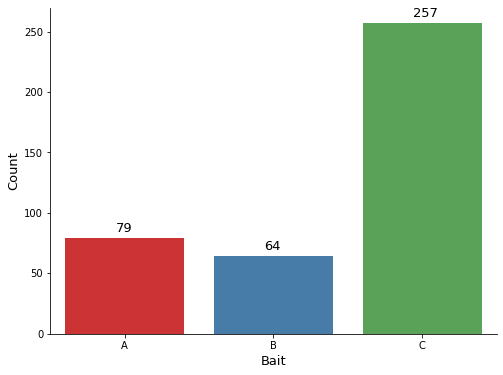

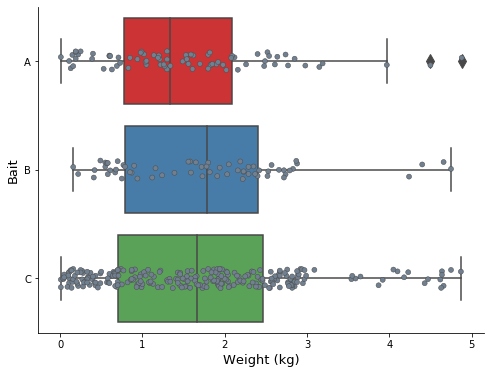

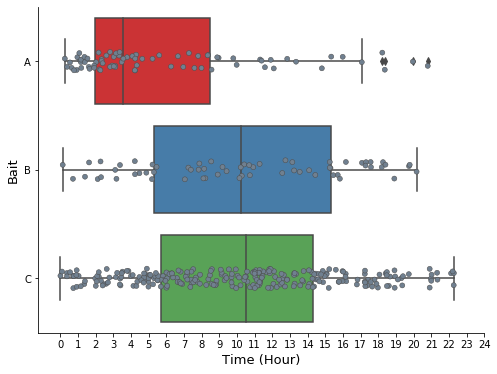

In [10]:
tallies = time_weight_bait_data["Bait"].value_counts()
print(tallies)

plt.figure(figsize=(8,6))
ax = sns.countplot(x="Bait", data=time_weight_bait_data, order=["A", "B", "C"], palette="Set1")
plt.ylabel("Count", fontsize=13)
plt.xlabel("Bait", fontsize=13)
sns.despine()
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.34, p.get_height()+5), fontsize=13)
# plt.savefig("plot10", bbox_inches="tight")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x="Weight", y="Bait", data=time_weight_bait_data, order=["A", "B", "C"], palette="Set1", fliersize=10)
sns.stripplot(x="Weight", y="Bait", data=time_weight_bait_data, order=["A", "B", "C"], 
              jitter=0.09, size=5, linewidth=0.5, color="slategrey", marker="o")
plt.ylabel("Bait", fontsize=13)
plt.xlabel("Weight (kg)", fontsize=13)
sns.despine()
# plt.savefig('plot11', bbox_inches="tight")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x="Time", y="Bait", data=time_weight_bait_data, order=["A", "B", "C"], palette="Set1")
sns.stripplot(x="Time", y="Bait", data=time_weight_bait_data, order=["A", "B", "C"], 
              jitter=0.09, size=5, linewidth=0.5, color="slategrey", marker="o")
plt.ylabel("Bait", fontsize=13)
plt.xlabel("Time (Hour)", fontsize=13)
plt.xticks(list(range(25)))
sns.despine()
# plt.savefig('plot12', bbox_inches='tight')
plt.show()

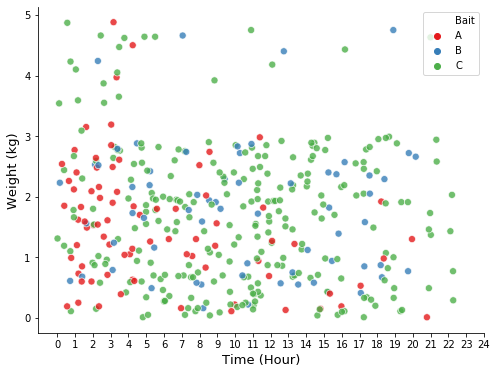

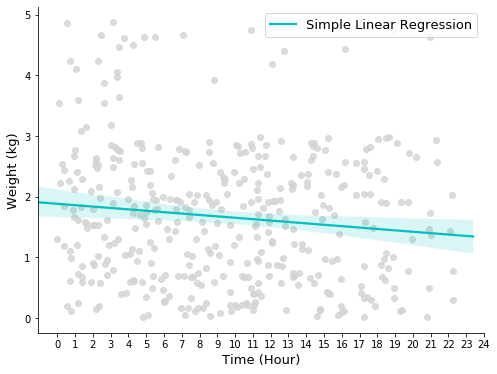

In [92]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Time", y="Weight", data=time_weight_bait_data, hue_order=["A", "B", "C"], hue="Bait", palette="Set1", alpha=0.8, s=50)
plt.xlabel("Time (Hour)", fontsize=13)
plt.ylabel("Weight (kg)", fontsize=13)
plt.xticks(list(range(25)))
sns.despine()
# plt.savefig("scatter1", bbox_inches="tight")
plt.show()

plt.figure(figsize=(8,6))
sns.regplot(x="Time", y="Weight", data=time_weight_bait_data, color='lightgrey', line_kws=dict(color='c', label='Simple Linear Regression'))
plt.xlabel("Time (Hour)", fontsize=13)
plt.ylabel("Weight (kg)", fontsize=13)
plt.xticks(list(range(25)))
plt.legend(fontsize=13)
sns.despine()
# plt.savefig("scatter2", bbox_inches='tight')
plt.show()

In [86]:
model = linear_model.LinearRegression()
model.fit(time_weight_bait_data[["Time"]], time_weight_bait_data["Weight"])
print(model.score(time_weight_bait_data[["Time"]], time_weight_bait_data["Weight"]))
print(model.coef_, model.intercept_)

0.014542668909103385
[-0.02305505] 1.8834378910695289


In [84]:
X = sm.add_constant(time_weight_bait_data[["Time"]])
model2 = sm.OLS(time_weight_bait_data["Weight"], X)
# Fit the model
model2_results = model2.fit()
# Evaluate the model
model2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.873
Date:                Sat, 16 Nov 2019   Prob (F-statistic):             0.0158
Time:                        21:11:19   Log-Likelihood:                -605.23
No. Observations:                 400   AIC:                             1214.
Df Residuals:                     398   BIC:                             1222.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8834      0.105     17.975      0.000       1.677       2.089
Time          -0.0231      0.010     -2.424      0.016      -0.042      -0.004
==============================================================================
Omnibus:                       24.078   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.085
Skew:                           0.636   Prob(JB):                     1.31e-06
Kurtosis:                       3.090   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

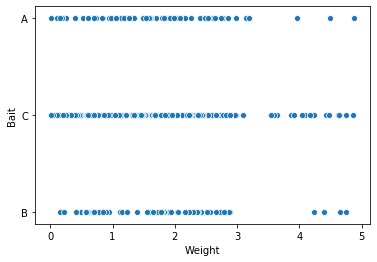

In [36]:
sns.scatterplot(x="Weight", y="Bait", data=time_weight_bait_data)

In [34]:
time_weight_bait_data.corr()

,Time,Weight
Time,1.000000,-0.120593
Weight,-0.120593,1.000000
